### Author: Mohd Hasan Khan
### Task 1 : Prediction using Supervised Machine Learning
### GRIP @ The Sparks Foundation

In this regression work, I attempted to forecast the percentage of marks a student should receive based on the quantity of study time they put in.

Given that there are only two variables, this linear regression exercise is straightforward.

#### 1. Importing Libraries

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Reading the Dataset

In [87]:
data=pd.read_csv("Book1.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### 3. Finding some Statistical Properties of the Data

In [88]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### 4. Finding Total Number of Rows and Columns

In [89]:
data.shape

(25, 2)

#### 5. Checking the Existence of Null Values in the given data

In [90]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### 6. Printing the Scatterplot to Check the Relationship Between the Variables

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\pandas\plotting\_matplotlib\core.py:887: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)


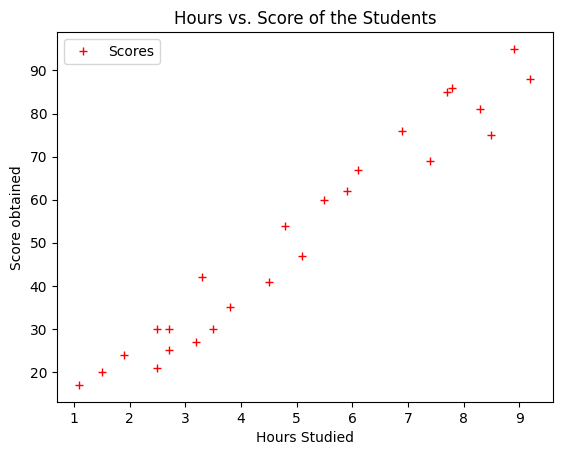

In [91]:
data.plot(x="Hours",y="Scores",style="o", color="red", marker='+')
plt.xlabel("Hours Studied")
plt.ylabel("Score obtained")
plt.title("Hours vs. Score of the Students")
plt.show()

#### 7. Manipulation of the Data

In [92]:
x=data.iloc[:,:-1]
x.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [93]:
y=data.iloc[:,1]
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

#### 8. Splitting the Data into Training and Testing Dataset

In [94]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=0)

#### 9. Fitting a Linear Regression Line to the Training Dataset

In [95]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
predicted_y=model.predict(x_train)

#### 10. Finding the Equation of the Regression Line

In [96]:
print(model.intercept_)
print(model.coef_)
lr_regression= model.coef_*x_train + model.intercept_
print("The equation of the fitted regression line is:")
print("Score=", model.coef_," hours=", model.intercept_)


2.0181600414346974
[9.91065648]
The equation of the fitted regression line is:
Score= [9.91065648]  hours= 2.0181600414346974


#### 11. Plotting the Regression Line

Text(0.5, 1.0, 'plot of fitted regression line on the given dataset')

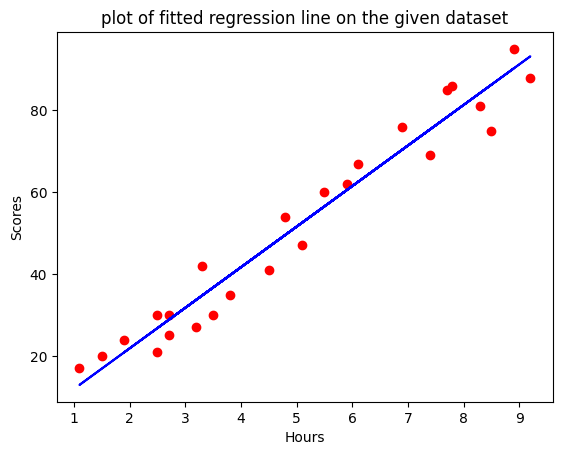

In [97]:
plt.plot(x,y,"o",color="r")
plt.plot(x_train,lr_regression, color="b")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("plot of fitted regression line on the given dataset")

#### 12. Predicting the Scores on the Testing Dataset

In [98]:
y_pred= model.predict(x_test)
print("The predicted values of score based on testing dataset is: ", y_pred)

The predicted values of score based on testing dataset is:  [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


#### 13. Comparing the Actual and the Predicted Score

In [99]:
df= pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


#### 14. Comparing the Actual and the Predicted Score Using a Bar Graph

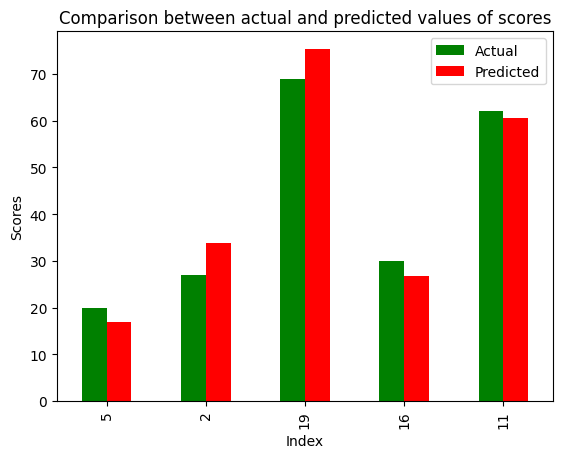

In [100]:
df.plot(kind="bar", color=("g","r"))
plt.xlabel("Index")
plt.ylabel("Scores")
plt.title("Comparison between actual and predicted values of scores")
plt.show()

#### 15. Evaluating the Model

In [101]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367
R-2: 0.9454906892105355


#### 16. Predicting the Percentage Score of a Student Who Studies for 9.25 Hours Per Day

In [102]:
print("The expected percentage score of a student who studies 9.25 hours per day is: ", model.predict([[9.25]]))

The expected percentage score of a student who studies 9.25 hours per day is:  [93.69173249]


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Conclusion
#### In this task we fitted the best fit linear model and evaluated the model to check it's goodness of fit. On doing this, we found a 94.5% R-squared value for the testing set, which is an excellent score. We also conclude from the fitted model that a student studying for 9.25 hours per day is expected to score 93.69%.